<a href="https://colab.research.google.com/github/Phonchanit/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# prompt: read file apndx.csv

import pandas as pd

# Assuming apndx.csv is in your Google Drive, adjust the path if needed
apndx_data = pd.read_csv('/content/drive/MyDrive/Dataset/apndx.csv')

In [174]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [175]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [176]:
apndx_data.shape

(260000, 25)

In [177]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna('No')

In [178]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,No
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,No
259998,No


In [179]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [180]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

In [181]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [182]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

In [183]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


## ลบข้อมูลที่รู้หลังจากรู้ว่าเป็นหรือไม่เป็นมะเร็งแล้ว

In [184]:
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days','Treatment_Type','Survival_Years_After_Diagnosis'])

## ลบข้อมูลที่ไม่น่าจะใช้สร้าง Model ได้

In [185]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

In [186]:
apndx_data.shape

(260000, 20)

## แปลง Data ให้เป็นตัวเลข

In [187]:
set(apndx_data['Alcohol_Consumption'])

{'High', 'Low', 'Moderate'}

In [188]:
print(apndx_data.columns)

Index(['Age', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Consumption',
       'Family_History_Cancer', 'Genetic_Mutations', 'Chronic_Diseases',
       'Physical_Activity_Level', 'Diet_Type', 'Radiation_Exposure',
       'Previous_Cancers', 'Blood_Pressure', 'Cholesterol_Level',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Platelet_Count',
       'Tumor_Markers', 'Symptom_Severity', 'Appendix_Cancer_Prediction'],
      dtype='object')


In [189]:
# prompt: transform string into integer

gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
smoking_mapping = {'No': 0, 'Yes': 1}
alcohol_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
Family_History_Cancer_mapping = {'No': 0, 'Yes': 1}
Genetic_Mutations = {'No': 0, 'Yes': 1}
Physical_Activity_Level = {'Low': 0, 'Moderate': 1, 'High': 2}
Radiation_Exposure = {'No': 0, 'Yes': 1}
Previous_Cancers = {'No': 0, 'Yes': 1}
Tumor_Markers = {'Negative': 0, 'Positive': 1}
Symptom_Severity = {'Mild': 0, 'Moderate': 1, 'Severe': 2}
Appendix_Cancer_Prediction = {'No': 0, 'Yes': 1}

# Apply the mappings to the DataFrame columns
apndx_data['Gender'] = apndx_data['Gender'].map(gender_mapping)
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(smoking_mapping)
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(alcohol_mapping)
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(Family_History_Cancer_mapping)
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(Genetic_Mutations)
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(Physical_Activity_Level)
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(Radiation_Exposure)
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(Previous_Cancers)
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(Tumor_Markers)
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(Symptom_Severity)
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(Appendix_Cancer_Prediction)


In [190]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  int64  
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         260000 non-null  int64  
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [191]:
# prompt: transform Chronic_Diseases Gender Diet_Type using one-hot-encoder

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')
# Fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])
# Transform the data
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()
# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))
# Concatenate the encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)
# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)
# Display the updated DataFrame
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## เก็บ Test เอาไว้วัดผลตอนจบ

In [192]:
# prompt: random sampling 60000 data and also keep the rest

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(apndx_data, test_size=60000, random_state=6) # 0.001 corresponds to ~60 samples for 60,000 total

# Now you have 'train_data' containing ~59940 samples and 'test_data' containing ~60 samples
# Concatenate them back if you need the original apndx_data
# apndx_data = pd.concat([train_data,test_data])

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (200000, 26)
Test data shape: (60000, 26)


In [193]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214


In [194]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Gender_0,Gender_1,Gender_2,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,...,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,...,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


In [195]:
30214/169786

0.17795342372162604

## เลือก Model ที่ดีที่สุด (Model Selection)
1. Decision Tree
2. (Short) Decision Tree
3. naive Bayes

### แบ่ง Data เป็น 10 ก้อน (Split data into 10 folds)

In [196]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=6)

X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

### Decision Tree

In [197]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier() #default
# traim & evaluation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [198]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())


Cross-validation scores: [0.7239  0.7253  0.7271  0.72185 0.72575 0.7236  0.7223  0.7277  0.7275
 0.7257 ]
Mean accuracy 0.7250699999999999
Standard deviation 0.001985598146655054


### (Short) Decision Tree

In [199]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier(max_depth=5) #default
# train & evaluation (cross validation)
cv_scores2 = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [200]:
print("Cross-validation scores:", cv_scores2)
print('Mean accuracy', cv_scores2.mean())
print('Standard deviation', cv_scores2.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.84875 0.849   0.8506  0.84955 0.8494  0.84525
 0.8493 ]
Mean accuracy 0.848865
Standard deviation 0.001311115936902628


### Naive Bayes

In [201]:
# import
from sklearn.naive_bayes import GaussianNB
# define
nb_classifier = GaussianNB()
# traim & evaluation (cross validation)
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [202]:
print("Cross-validation scores:", cv_scores)
print('Mean accuracy', cv_scores.mean())
print('Standard deviation', cv_scores.std())

Cross-validation scores: [0.84915 0.84865 0.8491  0.8473  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Mean accuracy 0.84878
Standard deviation 0.0013749909090608461


In [203]:
import numpy as np

In [204]:
print(np.isnan(X_train).sum())

Age                              0
BMI                              0
Smoking_Status                   0
Alcohol_Consumption              0
Family_History_Cancer            0
Genetic_Mutations                0
Physical_Activity_Level          0
Radiation_Exposure               0
Previous_Cancers                 0
Blood_Pressure                   0
Cholesterol_Level                0
White_Blood_Cell_Count           0
Red_Blood_Cell_Count             0
Platelet_Count                   0
Tumor_Markers                    0
Symptom_Severity                 0
Chronic_Diseases_Diabetes        0
Chronic_Diseases_Hypertension    0
Chronic_Diseases_No              0
Gender_0                         0
Gender_1                         0
Gender_2                         0
Diet_Type_Non-Vegetarian         0
Diet_Type_Vegan                  0
Diet_Type_Vegetarian             0
dtype: int64


## เลือกโมเดลที่แม่นที่สุด คือ (Short) Tree มา Train ด้วย all training data

In [205]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier(max_depth=5) #default
#train
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

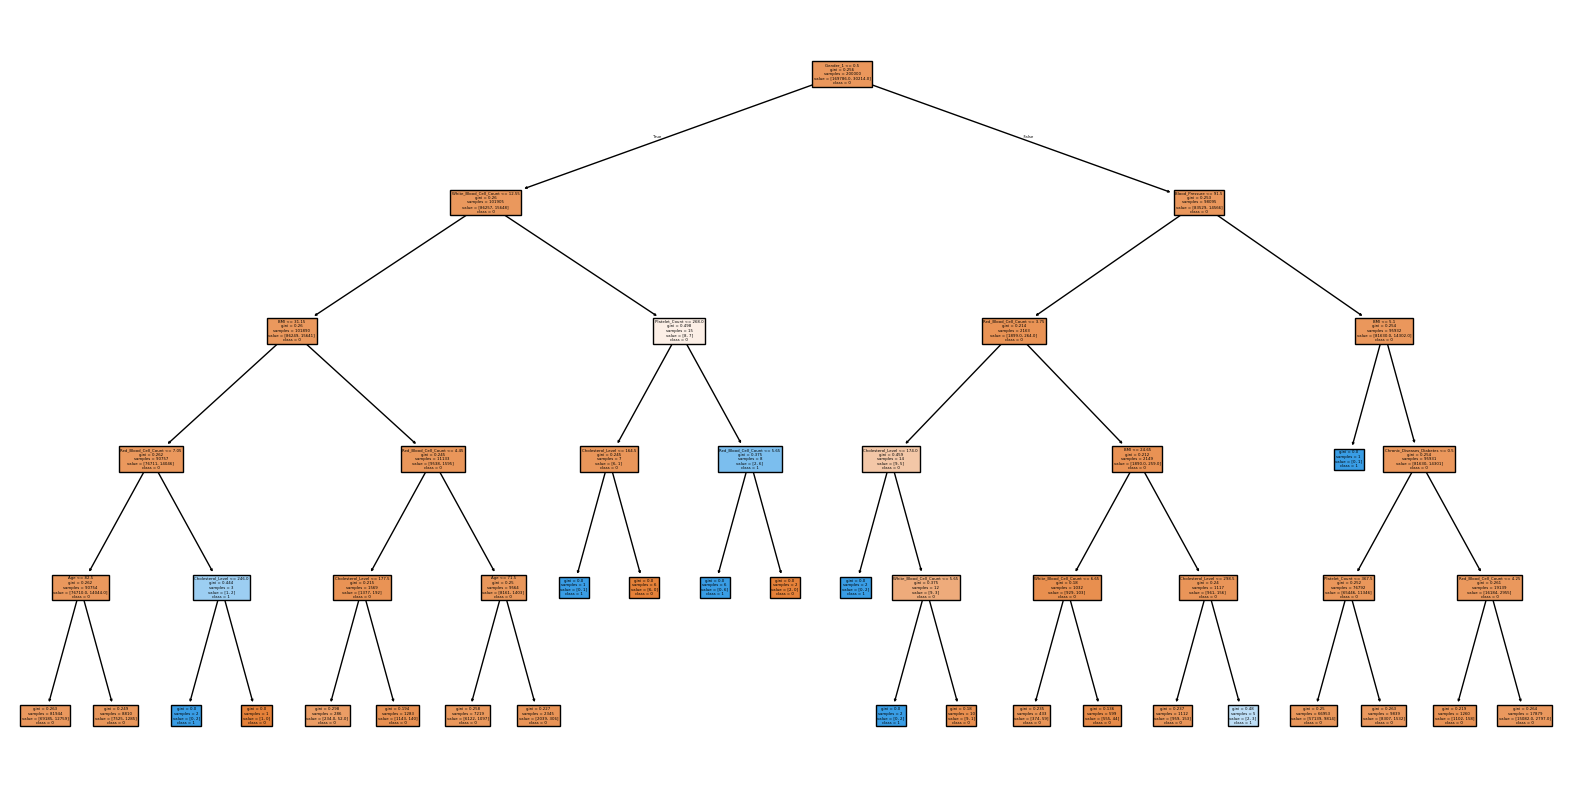

In [206]:
# prompt: show the trained tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_classifier is your trained decision tree model
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()


## วัดผลด้วย test data

In [207]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis=1)
y_test = test_data['Appendix_Cancer_Prediction']

# Predict
y_pred = dt_classifier.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8487333333333333


# Quiz 12: หาต้นไม้ตัดสินใจที่มี average cross-validation accuracy มากกว่า 84.887%

In [229]:
# define
tree_dt_classifier = DecisionTreeClassifier() #default
# traim & evaluation (cross validation)
cv_scores_tree = cross_val_score(tree_dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [230]:
print("Cross-validation scores:", cv_scores_tree)
print('Mean accuracy', cv_scores_tree.mean())
print('Standard deviation', cv_scores_tree.std())

Cross-validation scores: [0.72645  0.7231   0.723525 0.723975 0.723725]
Mean accuracy 0.724155
Standard deviation 0.0011827298930863564


In [222]:
# Short Decision Tree (max_depth=2)
short_dt_classifier = DecisionTreeClassifier(max_depth=2)
cv_scores_short_dt = cross_val_score(short_dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [223]:
print("Cross-validation scores:", cv_scores_short_dt)
print('Mean accuracy', cv_scores_short_dt.mean())
print('Standard deviation', cv_scores_short_dt.std())

Cross-validation scores: [0.849775 0.8474   0.84935  0.84925  0.848825]
Mean accuracy 0.84892
Standard deviation 0.0008178325011883277


In [224]:
#train
short_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

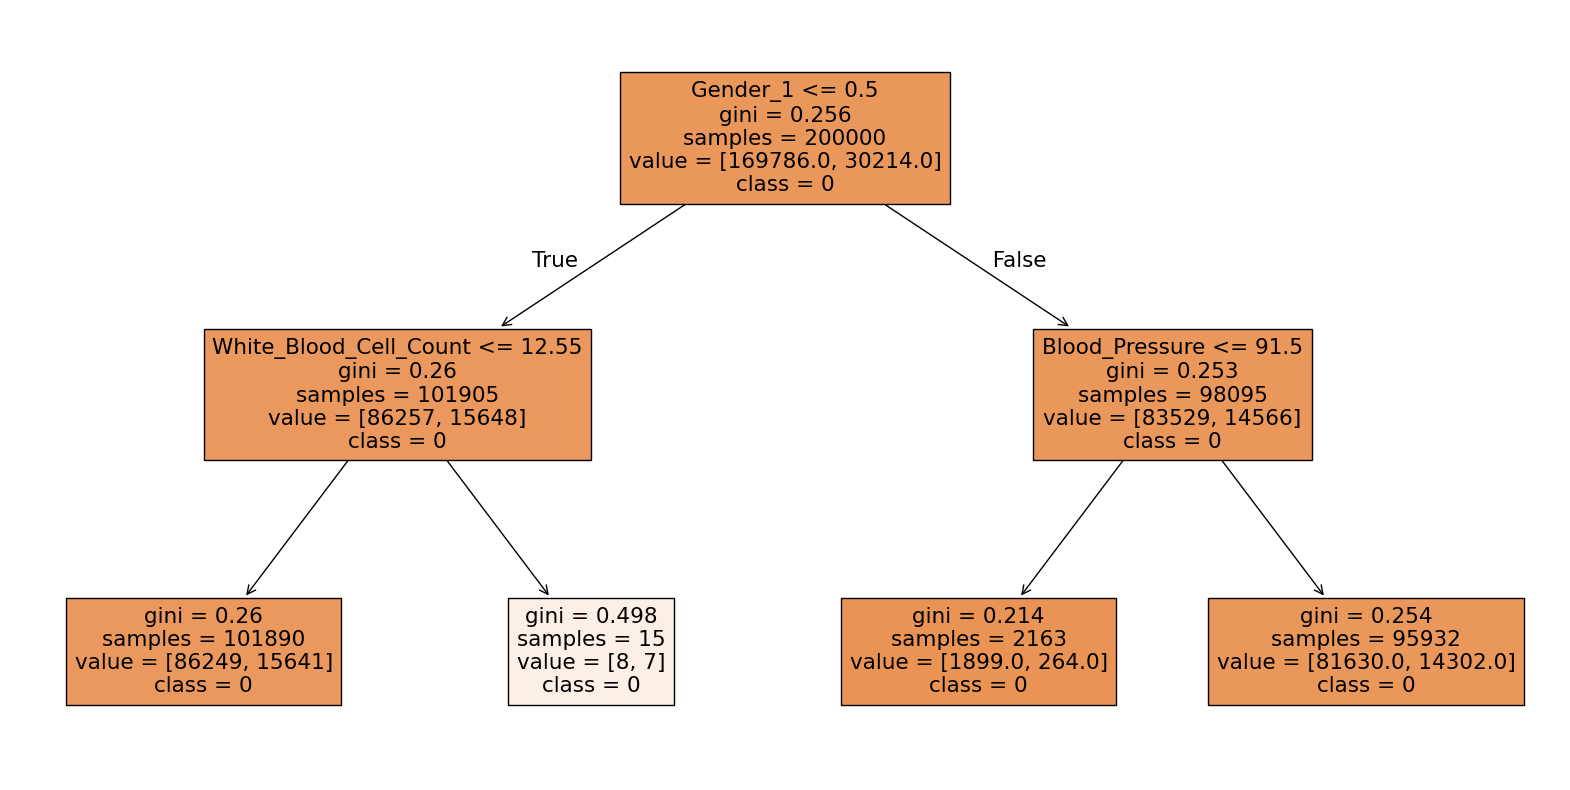

In [225]:
# Assuming dt_classifier is your trained decision tree model
plt.figure(figsize=(20,10))
plot_tree(short_dt_classifier, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()